In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""У нас есть четыре источника данных:
/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_CRM(23.11.2023).csv
/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_БК(23.11.2023).csv
/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/ВыгрузкаПартнеры_UTF-8(14.11.23).csv
/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/JSON

Плюс у нас есть неструктурированные данные по зарплатам по месяцам на всех сотрудников саппорта

По порядку

Все данные с начала 2019 года
    
"""

'У нас есть четыре источника данных:\n/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_CRM(23.11.2023).csv\n/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_БК(23.11.2023).csv\n/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/ВыгрузкаПартнеры_UTF-8(14.11.23).csv\n/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/JSON\n\nПлюс у нас есть неструктурированные данные по зарплатам по месяцам на всех сотрудников саппорта\n\nПо порядку\n\nВсе данные с начала 2019 года\n    \n'

In [6]:
crm_path = '/Users/andreykhalov/HULK/PHD/MFTI/VKR/diser/data/data_from_itsg/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_CRM(23.11.2023).csv'
buh_path = '/Users/andreykhalov/HULK/PHD/MFTI/VKR/diser/data/data_from_itsg/raw_data/Ноябрь 2023 выгрузка/CSV/Выгрузка_БК(23.11.2023).csv'
partn_path = '/Users/andreykhalov/HULK/PHD/MFTI/VKR/diser/data/data_from_itsg/raw_data/Ноябрь 2023 выгрузка/CSV/ВыгрузкаПартнеры_UTF-8(14.11.23).csv'
cont_path = '/Users/andreykhalov/HULK/PHD/MFTI/VKR/diser/data/data_from_itsg/raw_data/Ноябрь 2023 выгрузка/JSON'

crm_raw = pd.read_csv(crm_path, sep=';')
buh_raw = pd.read_csv(buh_path, sep=';')
partn_raw = pd.read_csv(partn_path, sep=';')



In [10]:
partn_raw.shape

(7676, 7)

In [9]:
crm_raw.shape

(277717, 23)

In [3]:
cont_raw = pd.read_json('/Users/andreykhalov/HULK/PHD/MFTI/VKR/diser/data/data_from_itsg/raw_data/Ноябрь 2023 выгрузка/JSON/Part1-01.19-02.19.json')

In [7]:
partn_raw['client'].nunique()

2616

In [8]:
buh_raw['company_name'].nunique()

1163

In [10]:
buh_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37789 entries, 0 to 37788
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           37789 non-null  int64  
 1   id_realisation  37789 non-null  object 
 2   date_issued     37789 non-null  object 
 3   author          37789 non-null  object 
 4   it_name         37688 non-null  object 
 5   company_name    37789 non-null  object 
 6   company_bin     37729 non-null  float64
 7   main_cp         1090 non-null   object 
 8   item            37789 non-null  object 
 9   price           37765 non-null  float64
 10  quan            37789 non-null  int64  
 11  summ_corr       37789 non-null  int64  
 12  seller          37789 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.7+ MB


In [11]:

buh_raw['summ_corr'].describe()

count    3.778900e+04
mean     1.933844e+05
std      1.294830e+06
min     -2.517500e+06
25%      7.500000e+03
50%      2.700000e+04
75%      8.800000e+04
max      8.633649e+07
Name: summ_corr, dtype: float64

In [12]:
cont_raw.sample(10)

,index,id_ticket,date,redirection,from,to,prev_cat,description,result
324,325,3c96cd7a-12f5-11e9-80e0-c4346b227f9c,2019-01-08 09:00:29,2019-01-12T13:17:23,,IT162 Кулебякин Александр,Запланировано,,"Подбирал картридж из оставшихся, все пустые кр..."
2520,2521,fd9cf1ea-1f91-11e9-80e0-c4346b227f9c,2019-01-24 10:38:28,2019-01-24T10:40:42,IT110 Очередь заявок удалёнки,IT115 МД Битюкова Дарья,Запланировано,Переадресовано от IT110 Очередь заявок удалён...,"удалила acrobat DC, удалила остаточные файлы r..."
2940,2941,38826a5e-22ed-11e9-80e0-c4346b227f9c,2019-01-28 13:30:00,2019-01-28T17:09:47,,IT167 Голушко Иван,Запланировано,Заправка картриджей,"278А - 2 заправки, 3 замены магнитника"
1537,1538,9df25c17-1978-11e9-80e0-c4346b227f9c,2019-01-16 16:21:43,2019-01-16T16:23:51,IT110 Очередь заявок удалёнки,IT146 Иванов Анатолий,Запланировано,Переадресовано от IT110 Очередь заявок удалён...,"Установил Adobe Acrobat XI, пересохранил фаилы..."
333,334,340201aa-12f0-11e9-80e0-c4346b227f9c,2019-01-08 09:20:08,NaN,NaN,NaN,Запланировано,Переадресовано от IT101 Будникова Марина 08.01...,"не включался ПК, проблема была в выключенной у..."
3160,3161,ba892717-23bb-11e9-80e0-c4346b227f9c,2019-01-29 17:00:36,2019-01-29T17:44:01,,IT109,Запланировано,Сделала обмен по документам Центр Тараз\n\n,Сделала обмен по документам Центр Тараз\n
1687,1688,9c29f714-1a05-11e9-80e0-c4346b227f9c,2019-01-17 14:30:41,2019-01-17T14:50:12,IT101 Мустафина Эльмира,IT133,Запланировано,Переадресовано от IT101 Будникова Марина 17.01...,"Приехал к клиенту, все письма что есть на серв..."
1901,1902,96228746-1b19-11e9-80e0-c4346b227f9c,2019-01-18 17:47:18,2019-01-18T18:07:12,,IT131 Исин Нурлан,Запланировано,Подключить сервера hetzner к мониторингу,KVM01\nKVM02\nKVM03\nKVM04\n\nFluidra + gw\nCl...
1147,1148,e287ed35-17bb-11e9-80e0-c4346b227f9c,2019-01-14 11:18:32,2019-01-14T11:18:54,,IT129 Буинцева Ирина,Запланировано,,Установил шрифты. Готово.
3221,3222,69861d08-2447-11e9-80e0-c4346b227f9c,2019-01-30 10:26:49,2019-01-30T10:31:38,IT110 Очередь заявок удалёнки,IT116 Кузнецов Александр,Запланировано,Переадресовано от IT110 Очередь заявок удалён...,Создала почтовый ainur_baisynbayeva@arb.kz\nНа...


In [13]:
crm_raw.head().T

,0,1,2,3,4
index,1.0,2.0,3.0,4.0,5.0
id_ticket,9668476a-12cd-11e7-b913-00226442b931,f6bae03c-fef6-11e6-ba18-00226442b931,05184c0a-542d-11e8-80ca-c4346b227f9c,f30a636a-542c-11e8-80ca-c4346b227f9c,480d4e89-4063-11e7-994b-00226442b931
parrent_id,65c79772-a7e8-11e6-8ff0-00226442b931,165c88b0-afd8-11e6-8ff0-00226442b931,3380722b-2fd8-11e7-99bb-00226442b931,412e6928-2fd7-11e7-99bb-00226442b931,85b54026-a894-11e6-8ff0-00226442b931
start,11.11.2016 14:23,11.11.2016 14:47,11.11.2016 16:40,11.11.2016 17:34,12.11.2016 10:57
end,29.05.2019 15:42,02.02.2019 09:30,01.05.2019 09:30,01.05.2019 09:30,20.05.2019 09:30
create,29.05.2019 15:12,02.02.2019 09:00,01.05.2019 09:00,01.05.2019 09:00,20.05.2019 09:00
author,IT116 Кузнецов Александр,IT115 МД Битюкова Дарья,IT126 Панарина Александра,IT126 Панарина Александра,IT109
contact_person,02 Елена Марченко вн.28,02 Валиева Найля,02 Федина Лидия вн.110,02 Федина Лидия вн.110,02 V Лучер Владимир (Директор финансовый) вн132
cp_position,Офис менеджер,NaN,Маркетолог,Маркетолог,Финансовый директор
cp_condition,Уволен,Работает,Работает,Работает,Работает


In [14]:
crm_raw[crm_raw['project']=='Напоминание']

,index,id_ticket,parrent_id,start,end,create,author,contact_person,cp_position,cp_condition,...,department,project,cat,norm,hours,client,client_tin/bin,like,marks,del_mark
0,1.0,9668476a-12cd-11e7-b913-00226442b931,65c79772-a7e8-11e6-8ff0-00226442b931,11.11.2016 14:23,29.05.2019 15:42,29.05.2019 15:12,IT116 Кузнецов Александр,02 Елена Марченко вн.28,Офис менеджер,Уволен,...,Удаленная IT поддержка,Напоминание,"1 Сайты (домены, хостинги, работа с сайтом, пр...",NaN,0,A02 Beautyprof (бьютипроф),061140009703,NaN,Запланировано,Да
2,3.0,05184c0a-542d-11e8-80ca-c4346b227f9c,3380722b-2fd8-11e7-99bb-00226442b931,11.11.2016 16:40,01.05.2019 09:30,01.05.2019 09:00,IT126 Панарина Александра,02 Федина Лидия вн.110,Маркетолог,Работает,...,Удаленная IT поддержка,Напоминание,"1 Сайты (домены, хостинги, работа с сайтом, пр...",NaN,"0,5","A02 HELP (Консалтинговая Группа HELP, ТОО FinS...",070440007589,NaN,Запланировано,Да
3,4.0,f30a636a-542c-11e8-80ca-c4346b227f9c,412e6928-2fd7-11e7-99bb-00226442b931,11.11.2016 17:34,01.05.2019 09:30,01.05.2019 09:00,IT126 Панарина Александра,02 Федина Лидия вн.110,Маркетолог,Работает,...,Удаленная IT поддержка,Напоминание,"1 Сайты (домены, хостинги, работа с сайтом, пр...",NaN,"0,5","A02 HELP (Консалтинговая Группа HELP, ТОО FinS...",070440007589,NaN,Запланировано,Да
5,6.0,e663d18b-1786-11e8-80c9-c4346b227f9c,98c5c200-f724-11e6-ba18-00226442b931,03.12.2016 13:31,20.02.2019 09:52,18.02.2019 09:00,IT126 Панарина Александра,02 V Алексей Пя (Дизайнер),Контактное лицо,Уволен,...,1-линия,Напоминание,"1 Сайты (домены, хостинги, работа с сайтом, пр...",5.0,"0,5",R Метрополис (ГидроСтройТехнологии METROPOLIS ...,040940001631,NaN,Завершено,Нет
7,8.0,ae535b6d-17c5-11e8-80c9-c4346b227f9c,fdf9a300-f723-11e6-ba18-00226442b931,03.12.2016 13:42,27.02.2019 15:55,18.02.2019 09:00,IT126 Панарина Александра,02 Амрахова Дина,NaN,Работает,...,1-линия,Напоминание,"8 Интернет (сеть, проблемы, решения, монтаж)",5.0,"0,5","A02 Мыс Орда (форсгард, ForceGuard ТОО «Охранн...",181140000576,NaN,Завершено,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276548,276547.0,e195bd3c-851a-11ee-86a5-c4346bb7a003,13df3a40-7f9e-11ee-86a5-c4346bb7a003,17.11.2023 13:27,24.11.2023 13:57,24.11.2023 08:00,IT199 Жюкас Алёна,02 IT 126 Панарина Александра,Руководитель удалённой поддержки,Работает,...,1-линия,Напоминание,"6 Прочее ПО (антивирусы, офисы, чистка, провек...",NaN,"0,5","А02 ТОО IT Support Group (ITSG, саппорт, сапо...",070940025703,NaN,Пауза,Нет
276714,276713.0,1a1f8ecc-85d5-11ee-86a5-c4346bb7a003,debffcd8-2a27-4f18-bd2e-0f9be1cefc2c,18.11.2023 11:41,18.11.2023 11:46,18.11.2023 11:41,IT116 Кузнецов Александр,02 Алексеева Катерина,NaN,Работает,...,Выездные специалисты,Напоминание,NaN,NaN,2,"А02 ТОО ""OK.Медиа"" (ОК медиа)",120540001466,NaN,Завершено,Нет
277115,277114.0,2fa32056-8827-11ee-86a5-c4346bb7a003,cb0e88c2-721e-11ee-86a5-c4346bb7a003,21.11.2023 10:33,01.12.2023 11:03,01.12.2023 10:33,IT178 Пичененко Кирилл,02 Синяева Оксана,NaN,Работает,...,Удаленная IT поддержка,Напоминание,"11 Профилактика (проверка, backup, обзвон, выезд)",NaN,"0,5",A02 КазДинФарма,031240006281,NaN,Запланировано,Нет
277416,277415.0,9267b1a0-88fa-11ee-86a5-c4346bb7a003,NaN,22.11.2023 11:47,01.12.2023 12:46,01.12.2023 11:46,IT101 Мустафина Эльмира,02 IT101 Эльмира Мустафина,Координатор,Работает,...,Сервис,Напоминание,NaN,NaN,"0,5","А02 ТОО IT Support Group (ITSG, саппорт, сапо...",070940025703,NaN,Запланировано,Нет


In [15]:
# уберем колонку с индексом

crm_raw = crm_raw.drop(['index'], axis=1)

In [16]:
# приведем типы дат

crm_raw['start'] = pd.to_datetime(crm_raw['start'], dayfirst=True)
crm_raw['end'] = pd.to_datetime(crm_raw['end'], dayfirst=True)
crm_raw['create'] = pd.to_datetime(crm_raw['create'], dayfirst=True)

In [56]:
crm_raw[crm_raw['start'] == crm_raw['start'].max()].T

,277716
id_ticket,d8d03682-e5a0-4046-8f51-e6675d4513b0
parrent_id,NaN
start,2023-11-23 14:06:00
end,NaT
create,2023-11-23 14:06:00
author,Site
contact_person,01 Еньшин Николай Викторович
cp_position,Зам. директора
cp_condition,Работает
cp_sex,Мужской


In [17]:
crm_raw['cp_condition'].value_counts()

cp_condition
Работает                233363
Уволен                   38677
Временно не работает       266
7                            1
10                           1
Name: count, dtype: int64

In [18]:
crm_raw.isnull().mean() * 100

#ID оборудования начали нормально записывать только с 2021 года (в половине случаев)

id_ticket          0.000720
parrent_id        82.641322
start              0.000720
end                0.109464
create             0.000720
author             0.000000
contact_person     1.155493
cp_position       58.229421
cp_condition       1.947666
cp_sex            10.000468
equipment_id      71.424508
it_name            0.001440
department         0.548400
project            0.204165
cat                8.533507
norm              16.411311
hours              0.001440
client             0.170317
client_tin/bin     2.036246
like              94.692799
marks              0.001440
del_mark           0.001440
dtype: float64

In [19]:
crm_raw['duration'] = crm_raw['end'] - crm_raw['start']

In [20]:
crm_raw['duration_hours'] = crm_raw['duration'].dt.total_seconds() / 3600

<Axes: >

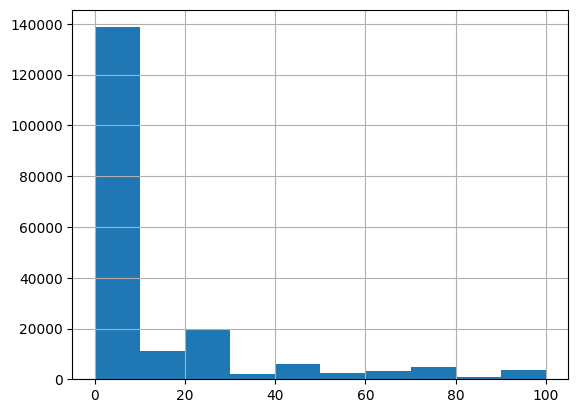

In [21]:
crm_raw[(crm_raw['duration_hours'] < 100) & (crm_raw['duration_hours'] > 0)]['duration_hours'].hist()

In [22]:
crm_raw['duration_hours'].quantile(0.15)
crm_raw['duration_hours'].quantile(0.95)

240.98333333333332

Text(0, 0.5, 'количество заявок')

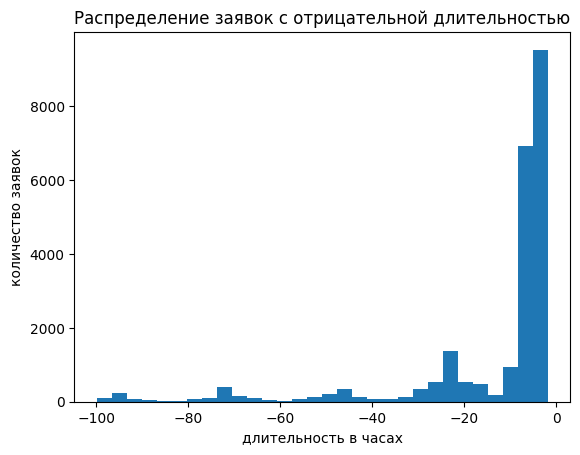

In [23]:
plt.hist(crm_raw[(crm_raw['duration_hours'] < crm_raw['duration_hours'].quantile(0.10)) & (crm_raw['duration_hours'] > -100)]['duration_hours'], bins=30);
plt.title('Распределение заявок с отрицательной длительностью')
plt.xlabel('длительность в часах')
plt.ylabel('количество заявок')

Text(0, 0.5, 'количество заявок')

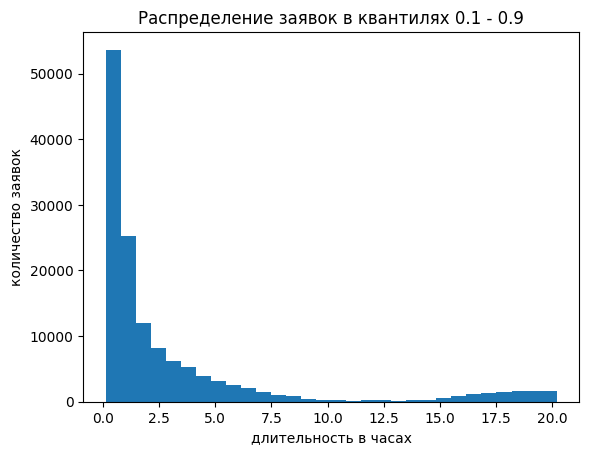

In [24]:
# распределение длительности заявок в квантилях 0.1 и 0.9

plt.hist(crm_raw[(crm_raw['duration_hours'] > crm_raw['duration_hours'].quantile(0.25)) & (crm_raw['duration_hours'] < crm_raw['duration_hours'].quantile(0.75))]['duration_hours'], bins=30);
plt.title('Распределение заявок в квантилях 0.1 - 0.9')
plt.xlabel('длительность в часах')
plt.ylabel('количество заявок')

Text(0, 0.5, 'количество заявок')

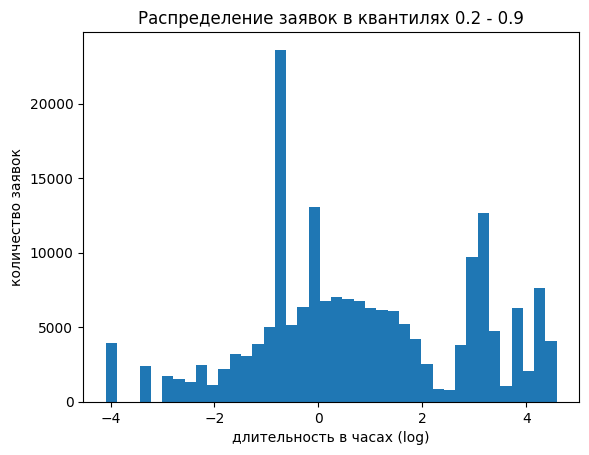

In [25]:
#прологарифмируем

plt.hist(np.log(crm_raw[(crm_raw['duration_hours'] > crm_raw['duration_hours'].quantile(0.2)) & (crm_raw['duration_hours'] < crm_raw['duration_hours'].quantile(0.9))]['duration_hours']), bins=40);
plt.title('Распределение заявок в квантилях 0.2 - 0.9')
plt.xlabel('длительность в часах (log)')
plt.ylabel('количество заявок')

Text(0, 0.5, 'длительность в часах')

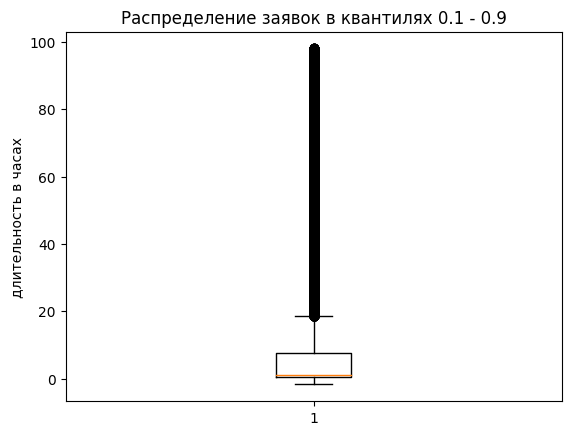

In [26]:
# построим ящик с усами

plt.boxplot(crm_raw[(crm_raw['duration_hours'] > crm_raw['duration_hours'].quantile(0.1)) & (crm_raw['duration_hours'] < crm_raw['duration_hours'].quantile(0.9))]['duration_hours']);
plt.title('Распределение заявок в квантилях 0.1 - 0.9')
plt.ylabel('длительность в часах')

# наблюдается большое количество выбросов

In [27]:
# обнаружилось много значений разницы во времени меньше нуля, возможно перепутан знак
# проверим распределение по годам

index_neg = crm_raw[(crm_raw['duration_hours'] < 0) & (crm_raw['duration_hours'] > -10)]['duration_hours'].index

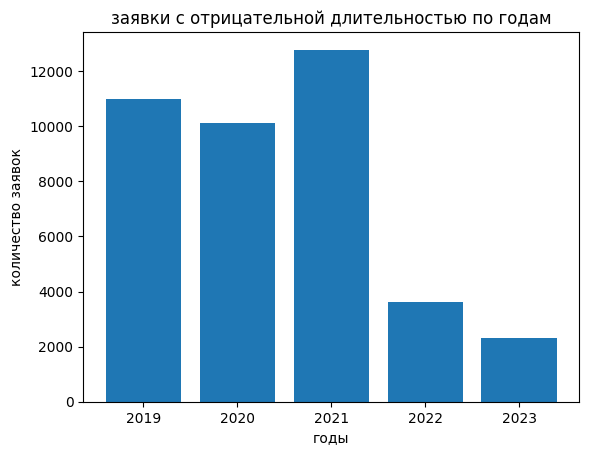

In [28]:
grouped = crm_raw[(crm_raw['duration_hours'] < 0)].groupby(crm_raw['end'].dt.year)

# Вычисление количества записей в каждой группе
counts = grouped.size()

# Создание гистограммы
plt.bar(counts.index, counts.values)

# как видно с 2022 года таких показателей стало меньше. Длительность заявки это целевая переменная,
# поэтому надо максимально осторожно с ней работать, пока займемся другими данными

plt.title('заявки с отрицательной длительностью по годам')
plt.ylabel('количество заявок')
plt.xlabel('годы');

In [29]:
crm_raw.iloc[103002]

id_ticket                      21e81ef8-9200-11eb-88d3-7824af865b1b
parrent_id                                                      NaN
start                                           2021-03-31 15:04:00
end                                             2021-03-26 12:30:00
create                                          2021-03-26 12:00:00
author                                    IT197 БШ Степанов Николай
contact_person                                        02 ДЛЯ ЗАЯВОК
cp_position                                                     NaN
cp_condition                                               Работает
cp_sex                                                          NaN
equipment_id                                                    NaN
it_name                                   IT197 БШ Степанов Николай
department                                              Бейнеу (БШ)
project                                        Выездные специалисты
cat                        3 Почта (настройка, с

In [30]:
# посчитаем время в минутах от регистрации до старта

crm_raw['reaction_time'] = crm_raw['start'] - crm_raw['create']

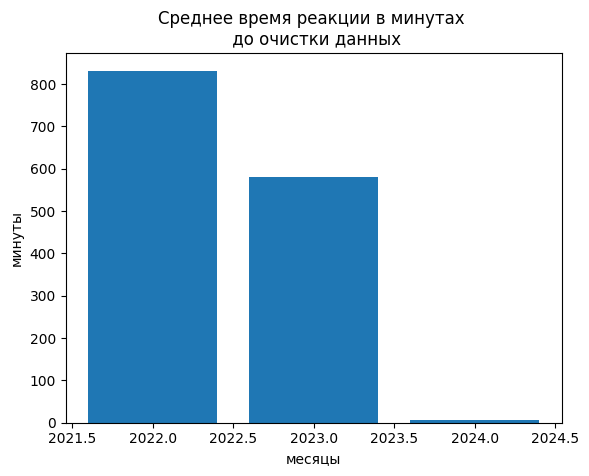

In [46]:
# вычисляем среднее время реакции по годам

crm_raw['reaction_time_mins'] = crm_raw['reaction_time'].dt.total_seconds() / 60

grouped_react = crm_raw[(crm_raw['reaction_time_mins'] > 0) & (crm_raw['end'].dt.year >= 2022)].groupby(crm_raw['end'].dt.year)

# Вычисление количества записей в каждой группе
counts = grouped_react['reaction_time_mins'].mean()

# Создание гистограммы
plt.bar(counts.index, counts.values)
plt.title('Среднее время реакции в минутах \n до очистки данных')
plt.ylabel('минуты')
plt.xlabel('месяцы');

Text(0, 0.5, 'количество заявок')

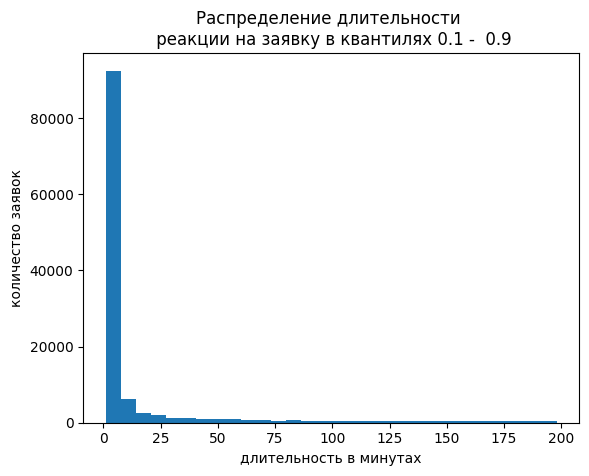

In [69]:
# посмотрим распределение длительности реакции

plt.hist(crm_raw[(crm_raw['reaction_time_mins'] > crm_raw['reaction_time_mins'].quantile(0.1)) & (crm_raw['reaction_time_mins'] < crm_raw['reaction_time_mins'].quantile(0.9))]['reaction_time_mins'], bins=30);
plt.title('Распределение длительности \n реакции на заявку в квантилях 0.1 -  0.9')
plt.xlabel('длительность в минутах')
plt.ylabel('количество заявок')

# в данных есть выбросы, которые сильно искажают результаты

Text(0, 0.5, 'количество заявок')

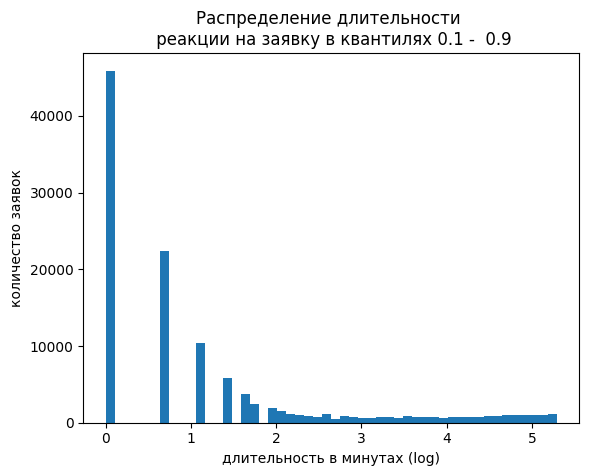

In [70]:
# посмотрим распределение длительности реакции в логарифмической шкале

plt.hist(np.log(crm_raw[(crm_raw['reaction_time_mins'] > crm_raw['reaction_time_mins'].quantile(0.1)) & (crm_raw['reaction_time_mins'] < crm_raw['reaction_time_mins'].quantile(0.9))]['reaction_time_mins']), bins=50);
plt.title('Распределение длительности \n реакции на заявку в квантилях 0.1 -  0.9')
plt.xlabel('длительность в минутах (log)')
plt.ylabel('количество заявок')

# распределение не нормальное

Text(0, 0.5, 'Длительность исполнения заявки в часах')

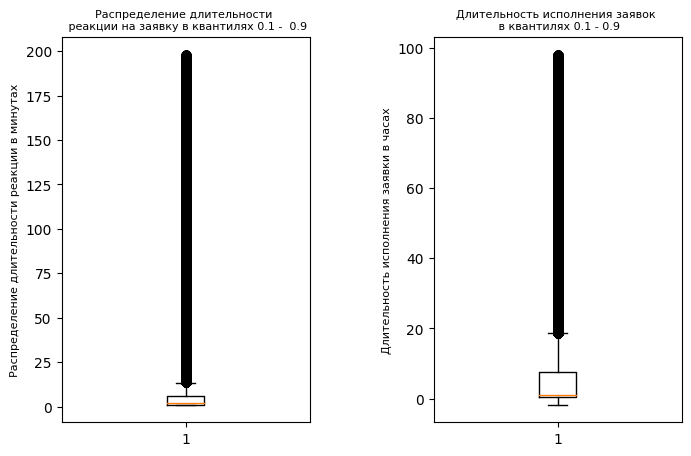

In [71]:
# построим диаграмму распределения 

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].boxplot(crm_raw[(crm_raw['reaction_time_mins'] > crm_raw['reaction_time_mins'].quantile(0.1)) & (crm_raw['reaction_time_mins'] < crm_raw['reaction_time_mins'].quantile(0.9))]['reaction_time_mins']);
ax[0].set_title('Распределение длительности \n реакции на заявку в квантилях 0.1 -  0.9', fontsize = 8)
ax[0].set_ylabel('Распределение длительности реакции в минутах', fontsize = 8)

fig.subplots_adjust(wspace=0.5)

ax[1].boxplot(crm_raw[(crm_raw['duration_hours'] > crm_raw['duration_hours'].quantile(0.1)) & (crm_raw['duration_hours'] < crm_raw['duration_hours'].quantile(0.9))]['duration_hours']);
ax[1].set_title('Длительность исполнения заявок \n в квантилях 0.1 - 0.9', fontsize = 8)
ax[1].set_ylabel('Длительность исполнения заявки в часах', fontsize = 8)

In [72]:
crm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277717 entries, 0 to 277716
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id_ticket           277715 non-null  object         
 1   parrent_id          48208 non-null   object         
 2   start               277715 non-null  datetime64[ns] 
 3   end                 277413 non-null  datetime64[ns] 
 4   create              277715 non-null  datetime64[ns] 
 5   author              277717 non-null  object         
 6   contact_person      274508 non-null  object         
 7   cp_position         116004 non-null  object         
 8   cp_condition        272308 non-null  object         
 9   cp_sex              249944 non-null  object         
 10  equipment_id        79359 non-null   object         
 11  it_name             277713 non-null  object         
 12  department          276194 non-null  object         
 13  project       

In [73]:
no_id = crm_raw[(crm_raw['create'].dt.year ==2023) & (crm_raw['equipment_id'].isnull())].sample(100)

In [74]:
no_id.to_csv('no_id_sample100.csv')

In [75]:
server_spec = [
    'Серверный специалист Windows (Виндовс)',
    'Серверные специалисты',
    'Серверный специалист Linux (Линукс)',
    ]



print(crm_raw['department'].value_counts().index)


Index(['1-линия', 'Серверный специалист Windows (Виндовс)',
       'Выездные специалисты', 'Маслодел', 'Проектный менеджер ITSG проектов',
       '3-линия', '2-линия', 'Сервис', 'Ремонт оргтехники', 'Астана', 'АУП',
       'Проектный менеджер по клиентам', 'ФудМастер (ФМ)',
       'Серверные специалисты', 'Альстом (Алм)',
       'Серверный специалист Linux (Линукс)', 'Отдел активных продаж',
       'Шымкент', 'Бухгалтерия', 'Отдел продаж 2-я линия',
       'Отдел продаж 1-я линия', 'Бейнеу (БШ)', 'HR', 'МИТУ', 'CWT (СВТ)',
       'Сервье', 'AETZ (АЕТЗ)', 'RCG (РСГ)', 'НИИ', 'ЭКОС',
       'Руководитель удаленной поддержки', 'Отдел продаж', 'BAT (БАТ)', 'PMI',
       'Lucent (Люсент)', 'Диалог', 'Джонсон', 'Avitim', 'Все подразделения',
       'Travel Plus (Тревел плюс)', 'JTI (ДжиТиАй)', 'Удаленная IT поддержка',
       'РЭЦЦА', 'Досжан Темир жолы (ДТ)', 'Иностры',
       'RG Brands (переданные задачи)', 'Помеченное на удаление или пустое',
       'RTE', 'EFES (Эфес)'],
      dtype='ob

In [95]:
crm_raw['hours'] = crm_raw['hours'].astype(str)

crm_raw['hours'] = crm_raw['hours'].apply(lambda x: x.replace(',','.'))


In [96]:
crm_raw['hours'] = crm_raw['hours'].astype(float)

In [106]:
october_only = crm_raw[(crm_raw['create'].dt.year == 2023) & (crm_raw['create'].dt.month == 10)]

In [111]:
october_only_server = october_only[october_only['department'].isin(server_spec)]
october_only_outstaff = 

In [148]:
vigr_hours = october_only_server.groupby('client')['hours'].agg(sum)

In [150]:
vigr_hours.to_csv('vigr_hours_october_clietns.csv')

In [120]:
df_zones = pd.read_excel('/Users/andreykhalov/HULK/PHD/ITSG_research/data/dima_061223/clients_analitics_061223.xlsx')
df_zones.drop_duplicates(inplace=True)

In [142]:
df_zones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 273
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        0 non-null      float64
 1   №                                 251 non-null    object 
 2   Юр. лицо                          241 non-null    object 
 3   Контрагент                        242 non-null    object 
 4   По факту (сумма в счете без НДС)  252 non-null    object 
 5   Обслуживание ПК                   201 non-null    object 
 6   Обслуживание ПК Себест            17 non-null     object 
 7   Маржа                             6 non-null      object 
 8   Аутсорсинг (Авдошкин И.)          26 non-null     object 
 9   Аутсорсинг (Авдошкин И.) Себест   17 non-null     object 
 10  Маржа.1                           6 non-null      object 
 11  Аутстаффинг                       36 non-null     object 
 12  Аутстаффинг с

In [125]:
df_buh = pd.read_csv('/Users/andreykhalov/HULK/PHD/ITSG_research/data/raw_data/Ноябрь 2023 выгрузка/CSV/buhnya_23.csv', sep=';')

In [130]:
df_buh['date_issued'] = pd.to_datetime(df_buh['date_issued'], dayfirst=True)

In [131]:
df_buh_october = df_buh[(df_buh['date_issued'].dt.year == 2023) & (df_buh['date_issued'].dt.month == 10)]

In [144]:
df_buh_october[df_buh_october['company_name'] == 'НИИ глазных болезней']

,index,id_realisation,date_issued,author,it_name,company_name,company_bin,main_cp,item,price,quan,summ_corr,seller
36594,36595,ce83fa67-61b1-11ee-86a4-c4346bb7a003,2023-10-03 11:58:00,IT196 Родионова Татьяна,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,SIP - телефон Yealink SIP - T30. 1 аккаунт,24650.0,1,24650,"ТОО "" IT SUPPORT GROUP """
36794,36795,95e42e88-6e5e-11ee-86a5-c4346bb7a003,2023-10-19 15:05:00,IT186 Аширова Арзыгуль,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,"SIP-телефон Yealink SIP-T30,1 аккаунт",24650.0,1,24650,"ТОО "" IT SUPPORT GROUP """
36795,36796,bf659ffa-6e5e-11ee-86a5-c4346bb7a003,2023-10-19 15:06:00,IT186 Аширова Арзыгуль,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,"SIP-телефон Yealink SIP-T30,1 аккаунт",24650.0,1,24650,"ТОО "" IT SUPPORT GROUP """
37371,37372,2cf86e7c-779c-11ee-86a5-c4346bb7a003,2023-10-31 23:59:00,IT144 Есева Елена,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,Абонентское обслуживание парка ПК на базе серв...,1250000.0,1,1250000,"ТОО ""IT Решения для бизнеса"""
37396,37397,804c5f12-7d5a-11ee-86a5-c4346bb7a003,2023-10-31 23:59:00,IT196 Родионова Татьяна,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,Дополнительные услуги в рамках обслуживания AS...,144500.0,1,144500,"ТОО ""IT Решения для бизнеса"""
37417,37418,2cf86e7c-779c-11ee-86a5-c4346bb7a003,2023-10-31 23:59:00,IT144 Есева Елена,IT144 Есева Елена,НИИ глазных болезней,9.902400e+11,NaN,Абонентское обслуживание парка ПК на базе серв...,140000.0,1,140000,"ТОО ""IT Решения для бизнеса"""


In [145]:
vigr = df_buh_october.groupby(['seller', 'company_name'])['price'].agg(sum)

In [147]:
vigr.to_csv('vigr_test.csv')